<a href="https://colab.research.google.com/github/yweslakarep123/decision_tree_CART_heart_disease/blob/main/decision_tree_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [79]:
!apt-get install -y graphviz
!pip install graphviz pydotplus

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_confusion_matrix
#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')

In [43]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Test_dataset/heart.csv')

In [44]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [45]:
n_cols = {'cp':'Chest Pain Type (CP)',
          'trestbps':'Resting Blood Pressure (trestbps)',
          'chol':'Serum Cholestoral (chol) mg/dl',
          'fbs':  'Fasting Blood Sugar (fbs) > 120 mg/dl',
          'restecg': 'Resting Electrocardiographic Results (restecg)',
          'thalach' : 'Maximum Heart Rate Achieved (thalach)',
          'exang': 'Exercise Induced Angina (exang)',
          'oldpeak' : 'ST depression (oldpeak)' ,
          'slope' : 'Slope of the ST Segment (slope)',
          'ca' : 'Number of Major Vessels (ca)',
          'thal' : 'Thal'}

data.rename(columns=n_cols ,inplace=True)
data.head()

,age,sex,Chest Pain Type (CP),Resting Blood Pressure (trestbps),Serum Cholestoral (chol) mg/dl,Fasting Blood Sugar (fbs) > 120 mg/dl,Resting Electrocardiographic Results (restecg),Maximum Heart Rate Achieved (thalach),Exercise Induced Angina (exang),ST depression (oldpeak),Slope of the ST Segment (slope),Number of Major Vessels (ca),Thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             1025 non-null   int64  
 1   sex                                             1025 non-null   int64  
 2   Chest Pain Type (CP)                            1025 non-null   int64  
 3   Resting Blood Pressure (trestbps)               1025 non-null   int64  
 4   Serum Cholestoral (chol) mg/dl                  1025 non-null   int64  
 5   Fasting Blood Sugar (fbs) > 120 mg/dl           1025 non-null   int64  
 6   Resting Electrocardiographic Results (restecg)  1025 non-null   int64  
 7   Maximum Heart Rate Achieved (thalach)           1025 non-null   int64  
 8   Exercise Induced Angina (exang)                 1025 non-null   int64  
 9   ST depression (oldpeak)                  

In [47]:
data.isnull().sum()

age                                               0
sex                                               0
Chest Pain Type (CP)                              0
Resting Blood Pressure (trestbps)                 0
Serum Cholestoral (chol) mg/dl                    0
Fasting Blood Sugar (fbs) > 120 mg/dl             0
Resting Electrocardiographic Results (restecg)    0
Maximum Heart Rate Achieved (thalach)             0
Exercise Induced Angina (exang)                   0
ST depression (oldpeak)                           0
Slope of the ST Segment (slope)                   0
Number of Major Vessels (ca)                      0
Thal                                              0
target                                            0
dtype: int64

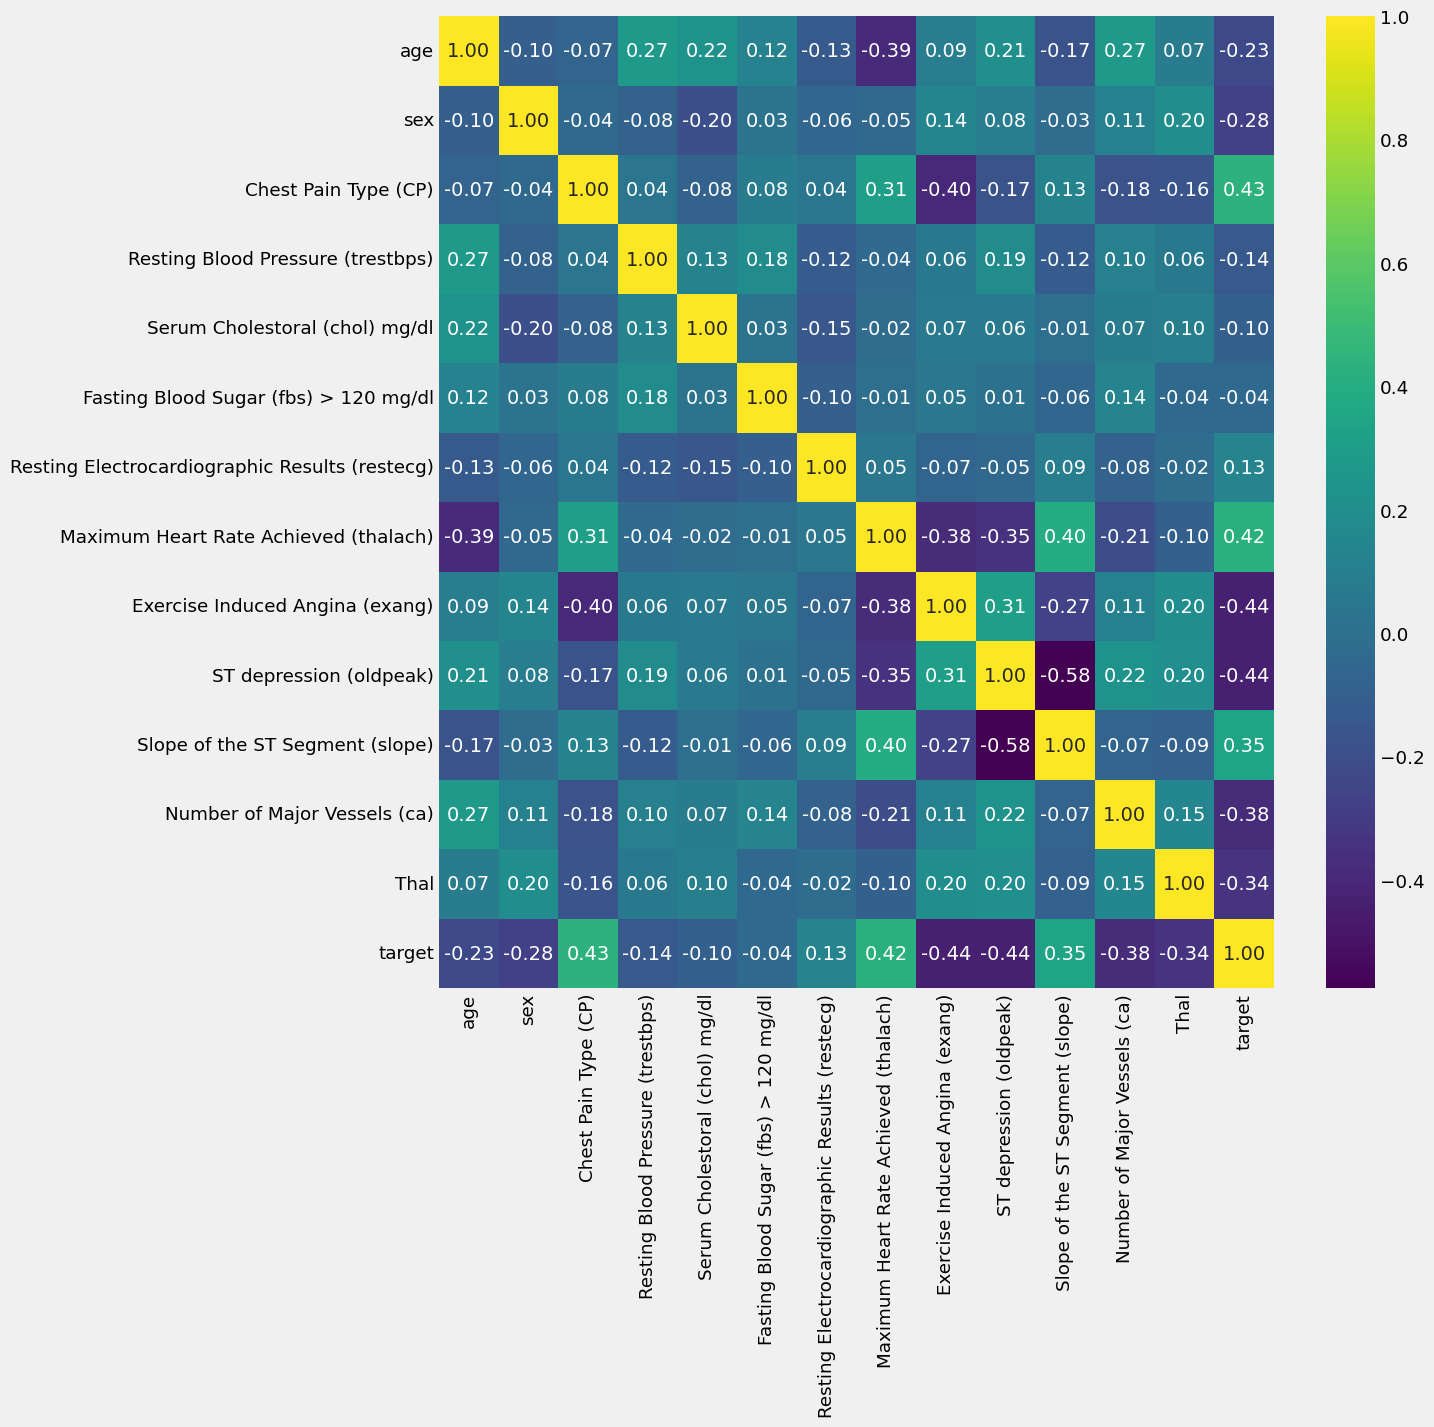

In [48]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()

In [49]:
#Clculate age
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print("min =",minAge ,"max =", maxAge , "mean =",meanAge)

min = 29 max = 77 mean = 54.43414634146342


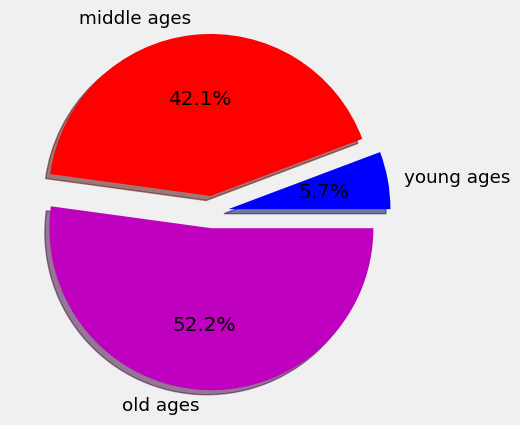

In [50]:
#Prepare ages for a bie chart
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Old = data[(data.age>55)]
plt.style.use('fivethirtyeight')
colors = ['b','r','m']
explode = [0.1,0.1,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Old)],labels=['young ages','middle ages','old ages'],explode=explode,shadow=True,colors=colors, autopct='%1.1f%%')
plt.show()

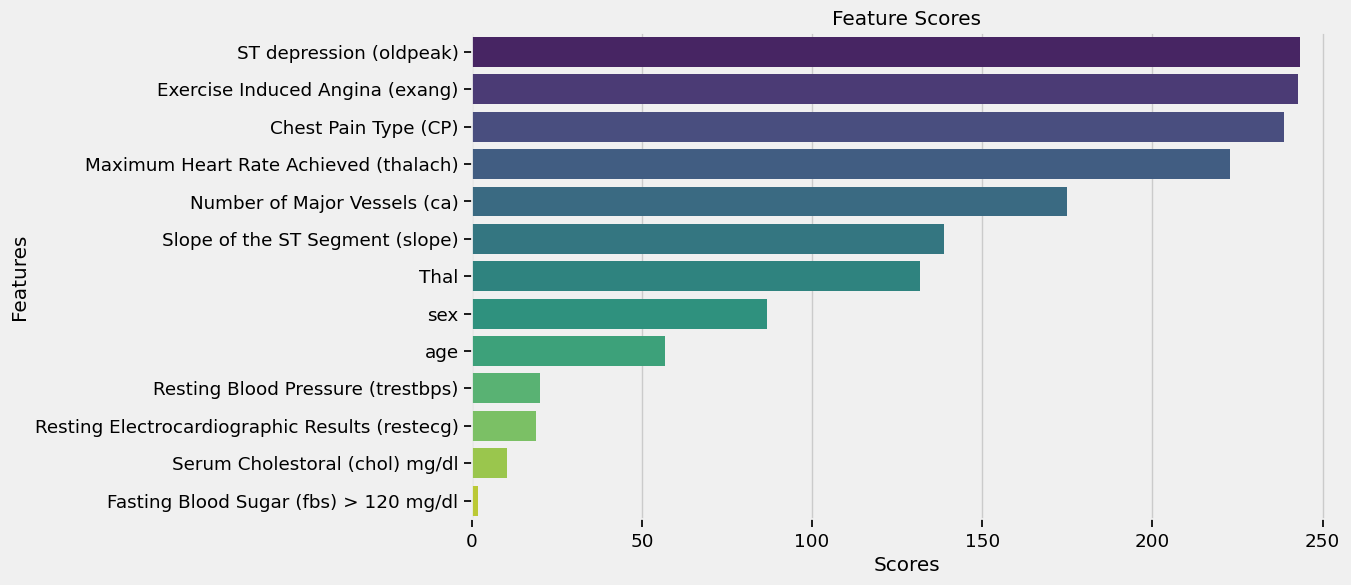

In [51]:
#There is no outliears
# Feature selection using SelectKBest with ANOVA F-value
X = data.drop(["target"], axis = 1)
y = data["target"]
selector = SelectKBest(f_classif, k=13)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame to store the feature names and their scores
feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)

# Plot the feature scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')
plt.title('Feature Scores')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

In [54]:
  X = X.drop(["Fasting Blood Sugar (fbs) > 120 mg/dl","Serum Cholestoral (chol) mg/dl",
            "Resting Electrocardiographic Results (restecg)","Resting Blood Pressure (trestbps)"], axis = 1)

In [55]:
#Scale all values for good Accuracy
sc = StandardScaler()
col = ['age',
       'sex',
       'Chest Pain Type (CP)',
       'Thal',
       'Exercise Induced Angina (exang)',
       'Slope of the ST Segment (slope)',
       'Number of Major Vessels (ca)',
       'Maximum Heart Rate Achieved (thalach)',
       'ST depression (oldpeak)']
X[col] = sc.fit_transform(X[col])
X.head()

,age,sex,Chest Pain Type (CP),Maximum Heart Rate Achieved (thalach),Exercise Induced Angina (exang),ST depression (oldpeak),Slope of the ST Segment (slope),Number of Major Vessels (ca),Thal
0,-0.268437,0.661504,-0.915755,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Membuat model Decision Tree
clf_tree = DecisionTreeClassifier(random_state=42)

# Menentukan parameter grid untuk pencarian
parameters_tree = {
    'criterion': ['gini', 'entropy'],  # atau 'log_loss' jika Anda menggunakan versi baru dari sklearn
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

# Melakukan Grid Search dengan Cross Validation
grid_clf_tree = GridSearchCV(clf_tree, parameters_tree, cv=6, n_jobs=-1)
grid_clf_tree.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]})

In [59]:
best_model_tree=grid_clf_tree.best_estimator_
y_pred_tree=best_model_tree.predict(X_test)

In [60]:
ac_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy score for model " f'{best_model_tree} : ',ac_tree)
cr_tree = classification_report(y_test, y_pred_tree)
print("classification_report for model " f'{best_model_tree} : \n',cr_tree)

Accuracy score for model DecisionTreeClassifier(criterion='entropy', random_state=42) :  0.9902597402597403
classification_report for model DecisionTreeClassifier(criterion='entropy', random_state=42) : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [82]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import joblib
import pydotplus
from IPython.display import Image
# Menggambar Decision Tree
dot_data = export_graphviz(best_model_tree, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Disease', 'Disease'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# Menyimpan grafik ke file
image_path = '/content/tree_stuff/best_tree_model.png'
graph.write_png(image_path)

True

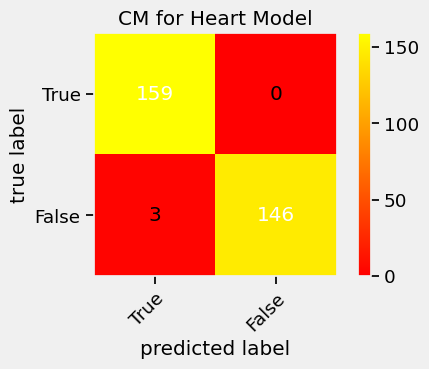

In [61]:
cm_rnf = confusion_matrix(y_test, y_pred_tree)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='autumn',
                               class_names = [True , False ],
                               figsize=(5, 3))
plt.title("CM for Heart Model")
plt.show()

In [62]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 526), (1, 526)]


In [63]:
y_pred_tree=best_model_tree.predict(X_resampled)

In [65]:
ac_tree = accuracy_score(y_resampled, y_pred_tree)
print("Accuracy score for model " f'{best_model_tree} : ',ac_tree)
cr_tree = classification_report(y_resampled, y_pred_tree)
print("classification_report for model " f'{best_model_tree} : \n',cr_tree)

Accuracy score for model DecisionTreeClassifier(criterion='entropy', random_state=42) :  0.997148288973384
classification_report for model DecisionTreeClassifier(criterion='entropy', random_state=42) : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       526
           1       1.00      0.99      1.00       526

    accuracy                           1.00      1052
   macro avg       1.00      1.00      1.00      1052
weighted avg       1.00      1.00      1.00      1052



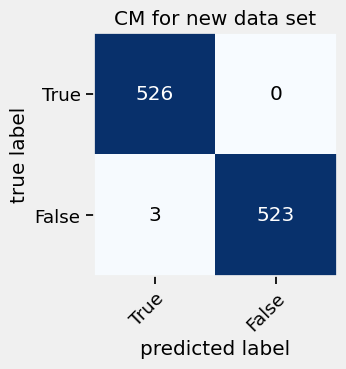

In [66]:
cm_rnf = confusion_matrix(y_resampled, y_pred_tree)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf , show_absolute=True, class_names = [True , False ],figsize=(5, 3))
plt.title('CM for new data set')
plt.show()

In [68]:
import pickle

# Misalkan model Anda disimpan dalam variabel 'model'
model_path = '/content/drive/MyDrive/test_model/best_model_tree.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(best_model_tree, file)
